<a href="https://colab.research.google.com/github/nlsvenkat/Basic-ML/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**EDA(Exploratory Data Analysis)**

#**Introduction :**

##what is EDA?

-  Explorative Data Analysis is a process where one learns about the data, forms insights and identifies important columns (features) that can be user to tell a story or later formulate a ML problem.

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning.

Plotting in EDA consists of:
  - Histograms
  - Box plot
  - Scatter plot and many more

For data analysis, Exploratory Data Analysis (EDA) must be your first step.                             
Exploratory Data Analysis helps us to :-
  - To give insight into a data set.
  - Understand the underlying structure.
  - Extract important parameters and relationships that hold between them.
  - Test underlying assumptions.

In this tutorial there is a clear explanation of EDA.

#Understanding EDA using sample Data set

To understand EDA , we should take the sample data. I’m taking the sample data on **State-Wise_covid19_Testing_Details** dataset.

##1.Importing the required libraries for EDA:

In order to perform **EDA** at first we should import some libraries namely:
  - numpy
  - pandas
  - seaborn
  - matplotlib

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

##2. Loading the data into the data frame:

After importing libraries we should load the data into pandas data frame by using **pd.read_csv("filepath")**.

We can also use **pd.read_csv("filename.csv")**, if the file and the script are in same folder.

Read the csv file using read_csv() function of pandas library and each data is separated by the delimiter “,” in given data set.

In [ ]:
df = pd.read_csv("/content/test.csv")
df.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


**"head()"** function will return the first five observations from the data set, Similarly we can get last five observations by using the **"tail()"** function of pandas library.

In [ ]:
df.shape

(14098, 5)

We can get the total number of rows and columns from the data set using ".shape".

#3.Checking the types of data

To analyse the data first we should know the types of data present in it.              
To find what all columns it contains, of what types and if they contain any value in it or not we can use **"info()"** function.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14098 entries, 0 to 14097
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          14098 non-null  object 
 1   State         14098 non-null  object 
 2   TotalSamples  14098 non-null  float64
 3   Negative      6348 non-null   object 
 4   Positive      5503 non-null   float64
dtypes: float64(2), object(3)
memory usage: 550.8+ KB


By observing the above data, we can conclude that :-
- Data contain 2float, and Three object values
- **Negative** column has objects
-  All the columns variable are non-null (no-empty or missing value)
- some of the rows are null in **Positive** and **Negative** columns since there are 14098 rows in total

From the above output we can observe that the negative column has objects.

- We can't do visualisation for **float64 Vs object**

#4.Dropping unnecessary columns

To make our data more versatile we should delete some unnecessary columns.        
To do that we can use ***.drop(["unnecessary column name"], axis=1)***   
- We can check whether the columns are removed are not using "head()"function which displays the first five rows

In [ ]:
df = df.drop(["Negative"], axis=1)
df.head()

,Date,State,TotalSamples,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,33.0


#5.Dropping the duplicate rows

We need to remove the duplicates to improve the accuracy of our visualisation.  
To remove the duplicates we have to find them.   
- To find the duplicates we can use **"duplicated()"** function 
- After that we can drop the duplicates using **"drop()"** function  

See the program below to get more clear.

In [ ]:
#Finding duplicates
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (1, 4)


In [ ]:
#counting total elements in each coloumn
print(df.count())

Date            14098
State           14098
TotalSamples    14098
Positive         5503
dtype: int64


- **"count()"** function is used to count total elements in each column

In [ ]:
#dropping duplicates
df = df.drop_duplicates()
#counting again after removing duplicate rows
print(df.count())

Date            14097
State           14097
TotalSamples    14097
Positive         5502
dtype: int64


Here we can observe that one row is deducted from the collection of rows,this is a duplicate row 

#6.Dropping the null values

Null values means empty values or empty cells which has no value. This empty cells or values will interrupt the analysis which is done using visualisation


We need to remove the null values as they interrupt the analysis
To remove the duplicates we have to find them.   
- To find the duplicates we can use **"duplicated()"** function 
- After that we can drop the duplicates using **"drop()"**   

To get more clear see the below example

In [ ]:
#Finding null values
print(df.isnull().sum())

Date               0
State              0
TotalSamples       0
Positive        8595
dtype: int64


From the above data we can observe that **Postive** column has nulll values,To notice how much space they occupy or how many null values are there among all values we have to analayse that to remove (or) to replace.  
  
If there are too many null values as compared to the total values we can eliminate them (or) if there are only some values we can replace them.   
  
To know that either we have to eliminate or delete (or) to replace them we have to visualise them first. 
 
To visualise the null values we can use **"heatmap(.isnull())"** function of seaborn library.


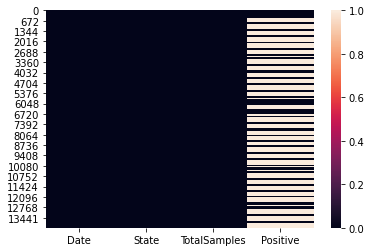

In [ ]:
#Heat map for null values representation
sns.heatmap(df.isnull())

- Here the null values or empty values are represented in white colour, non-null or non-empty values are represented in black colour

From the above heatmap we can notice that the null values are excessive so i'm just removing the null values by using **"dropna()"** function.

In [ ]:
#Dropping null values
df = df.dropna() 

- We removed the null values

Next we have to know that whether the null values are removed (or) not by again using heatmap.

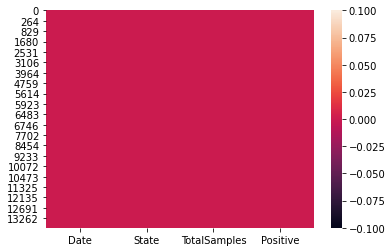

In [ ]:
sns.heatmap(df.isnull())

From the above heatmap we can say that all are of same values **i.e** non-empty values

#7.Finding outliers and removing them

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population (or) simply unusual values in a data set.For example if a dataset contains age as a class or column if there is a value like 999 in the age column it is a outlier because in general the age of a person will not be 999 it is an abnormal value so it can be treated as an outlier.

We need to remove the outliers as they deviate our analysis.To remove them we have to find them.
- We can graphically find them using box plot 

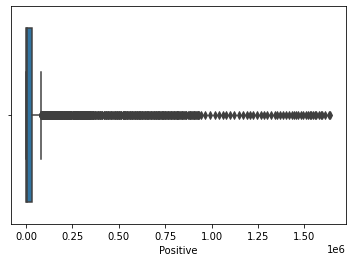

In [ ]:
#Box plot
sns.boxplot(x=df["Positive"])

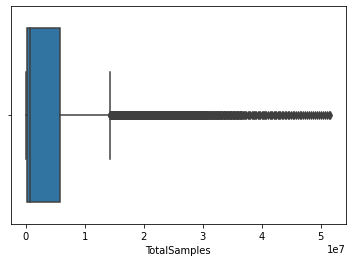

In [ ]:
sns.boxplot(x=df["TotalSamples"])

- outliers are the data points that are far from other data points

From the above two graphs we can notice that there are no such data points that are far from other data points.By this we can mention that there are no outliers in this data,so there is no need of removing.

- **Now we are ready to explore data by visualising them**

#6.plotting the histogram :

Histogram refers to the frequency of occurrence of variables in an interval.Here we will plot the histogram to know which state is repeated more or simply state frequency.

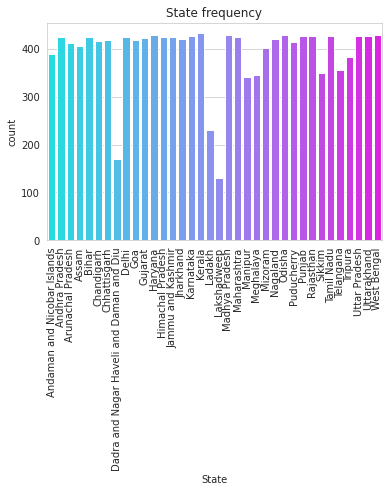

In [ ]:
#representing state frequency 
sns.set_style('whitegrid')
sns.countplot(x='State',data=df,palette='cool')
plt.title("State frequency")
plt.xticks(rotation=90)
plt.show()

#7.Plotting Heat map :

Heatmap is used to find out the correlation between different features in the dataset. High positive or negative value shows that the features have high correlation.This helps us to select the parameters for machine learning.We can plot a heatmap using the below code.

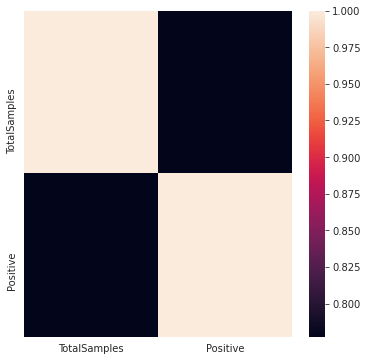

In [ ]:
#Heat map
plt.figure(figsize=(6,6))
c= df.corr()
sns.heatmap(c)

#8.Drawing a line plot :

In general line plot is used for comparision.Now i'm using this line plot to compare the Positive cases between the states.

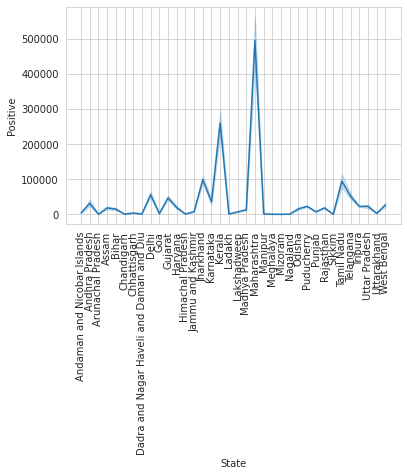

In [ ]:
#line plot
sns.lineplot(data=df,x="State",y="Positive")
plt.xticks(rotation=90)
plt.show()

From the above graph we can say that "as compared to other states maharastra has highest number of positive cases".  

#9.Drawing scatter plot :

Scatter plots are primary used to observe and show relationships between two numeric variables. The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole. Identification of correlational relationships are common with scatter plots.

- **pair plot :**    
  A pairs plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends for follow-up analysis and, fortunately, are easily implemented in Python.Pair plot represents all the scatter plots of different variables.

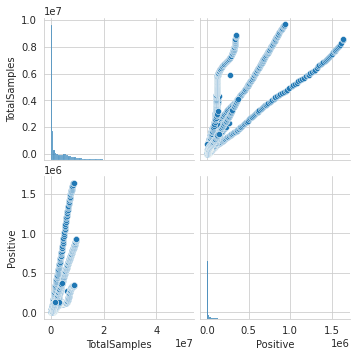

In [ ]:
#pair plot
sns.pairplot(df)

- Now we will do scatter plot for TotalSamples Vs Positive

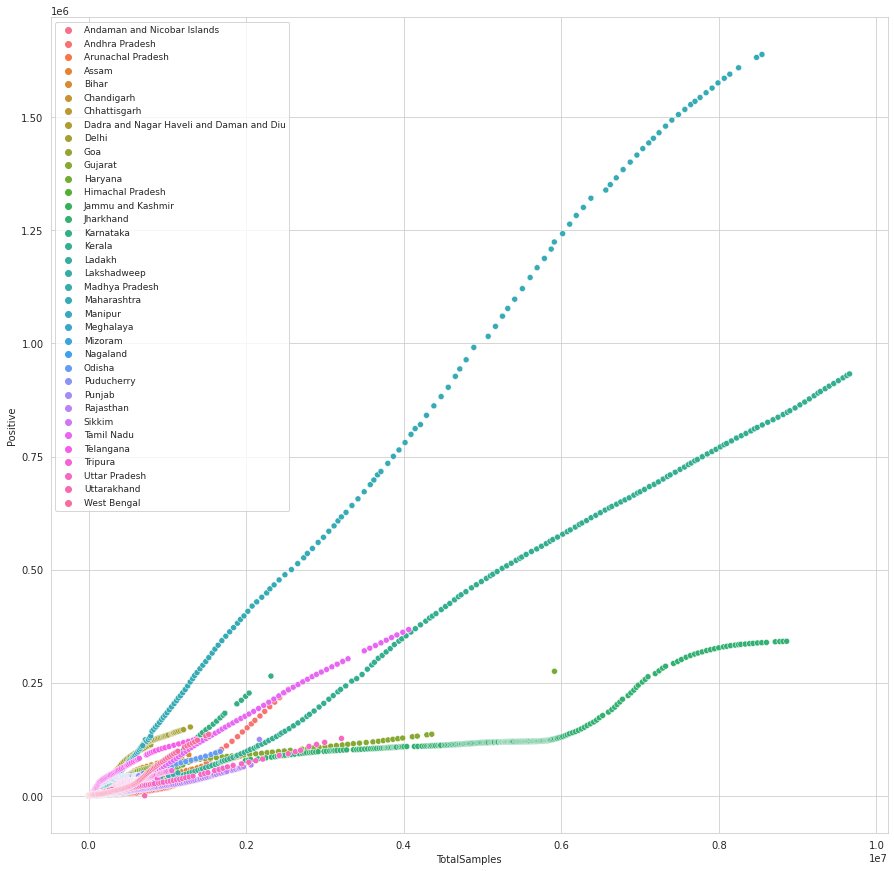

In [ ]:
#scatter plot
plt.figure(figsize=(15,15))
sns.scatterplot(x="TotalSamples",y="Positive",data=df,hue="State")
plt.legend(loc="upper left", frameon=True, fontsize=9)
plt.show()

From the above plot we can say which state has high positive rate

#Conclusion :

Hence the above are some of the steps involved in Exploratory data analysis, these are some general steps that you must follow in order to perform EDA.

From the above tutorial you can learn:
- Which libraries we should use for EDA.
- How to clean the data by removing unnecessary data.
- How to find the correlation between the variables.
- How to visualise the data from the given dataset by plotting against graphs.
- How to analyse the data from the obtained graphs of viaualisation.

If you want to know  more about EDA you can watch the tutorials from the below kaggle courses: 
- [NumPy Tutorial on Kaggle](https://www.kaggle.com/legendadnan/numpy-tutorial-for-beginners-data-science)
- [Kaggle Pandas Course](https://www.kaggle.com/learn/pandas)
- [Kaggle Data Visualization Course](https://www.kaggle.com/learn/data-visualization)
- [Data Cleaning Course on Kaggle](https://www.kaggle.com/learn/data-cleaning)